<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/Mod_03_class_10_ode_cinetica_problema_inverso_maio_25_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.optimize import differential_evolution
from scipy.integrate import odeint

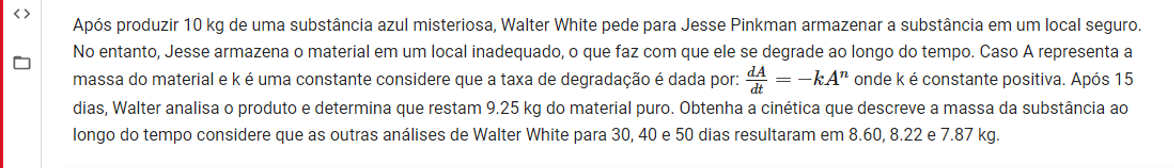

In [ ]:
x0 = 10.0
t0=0
time_values = [15.0, 30.0,40.0, 50.0]
x_true = [9.25,8.60,8.22,7.87]

In [ ]:
tf = time_values[-1]
t = np.linspace( 0, tf, 101 )
Time = t.tolist();
n = len(time_values)
Id = np.zeros(n,dtype=int)
for i in range(n):
  Id[i] =Time.index( time_values[i] )

In [ ]:
def fobj(x_calc,x_true):
  k=0
  soma = 0.0
  for x in x_calc:
    soma = soma + (x - x_true[k])**2
    k = k+1
  return soma

def edo( x, t,k, alpha):
  dA_dt = -k*x**alpha
  return dA_dt

def model( param):
  #global x0,x_true, n, t, Id
  k, alpha = param
  x_calc =np.zeros(n,dtype=float)
  Time = t.tolist();
  x_edo = odeint( edo, x0, t, args=(k, alpha)) # 
  x_calc = x_edo[Id]
  MIN = fobj(x_calc,x_true)
  return MIN


In [ ]:
bounds = [(0,1e-2), (0, 3)]
result = differential_evolution(model, bounds, maxiter = 200, popsize = 100)
k, alpha =  result.x
MELHOR = result.fun
x_best = odeint( edo, x0, t, args=(k, alpha))
x_best = x_best[Id]

In [ ]:
r_squared = r2_score(x_true,x_best)
print('k =',k,'alpha =', alpha,'fobj =', MELHOR,'R^2=',r_squared)

k = 0.0005290759063801683 alpha = 2.0105826966165243 fobj = [7.87766473e-06] R^2= 0.9999924752462208


In [ ]:
x_best

array([[9.24825626],
       [8.60211237],
       [8.21950443],
       [7.86964038]])